In [33]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50, 20
f = pd.read_csv('amzn.csv')
print(f.head())

         date    open    high     low   close    volume
0  1997-05-16  1.8650  1.9792  1.7083  1.7292  14700000
1  1997-05-19  1.7083  1.7708  1.6250  1.7083   6106800
2  1997-05-20  1.7292  1.7500  1.6358  1.6358   5467200
3  1997-05-21  1.6042  1.6458  1.3750  1.4275  18853200
4  1997-05-22  1.4375  1.4483  1.3125  1.3958  11776800


In [34]:
# date_before = datetime.date(2014,1,31)
df = f[f['date'] > '2014-01-31'].reset_index(drop = True)
print(df)

            date      open       high       low    close    volume
0     2014-02-03   358.980   360.8500   340.100   346.15  10280800
1     2014-02-04   349.590   353.9975   344.020   347.95   4812900
2     2014-02-05   346.000   349.3700   337.730   346.45   4435400
3     2014-02-06   347.403   354.8200   347.403   354.59   3335700
4     2014-02-07   358.980   361.8000   352.490   361.08   4330500
5     2014-02-10   361.610   365.0000   359.350   360.87   3449700
6     2014-02-11   361.842   363.6100   356.250   361.79   3222100
7     2014-02-12   356.430   357.7500   346.320   349.25   6587700
8     2014-02-13   347.700   357.2000   346.500   357.20   4175000
9     2014-02-14   359.340   359.3400   353.350   357.35   3520200
10    2014-02-18   355.280   355.7300   349.450   353.65   4998000
11    2014-02-19   352.640   354.5400   346.100   347.38   4168100
12    2014-02-20   348.800   350.4600   344.380   349.80   3492800
13    2014-02-21   352.440   354.1410   346.750   346.76   421

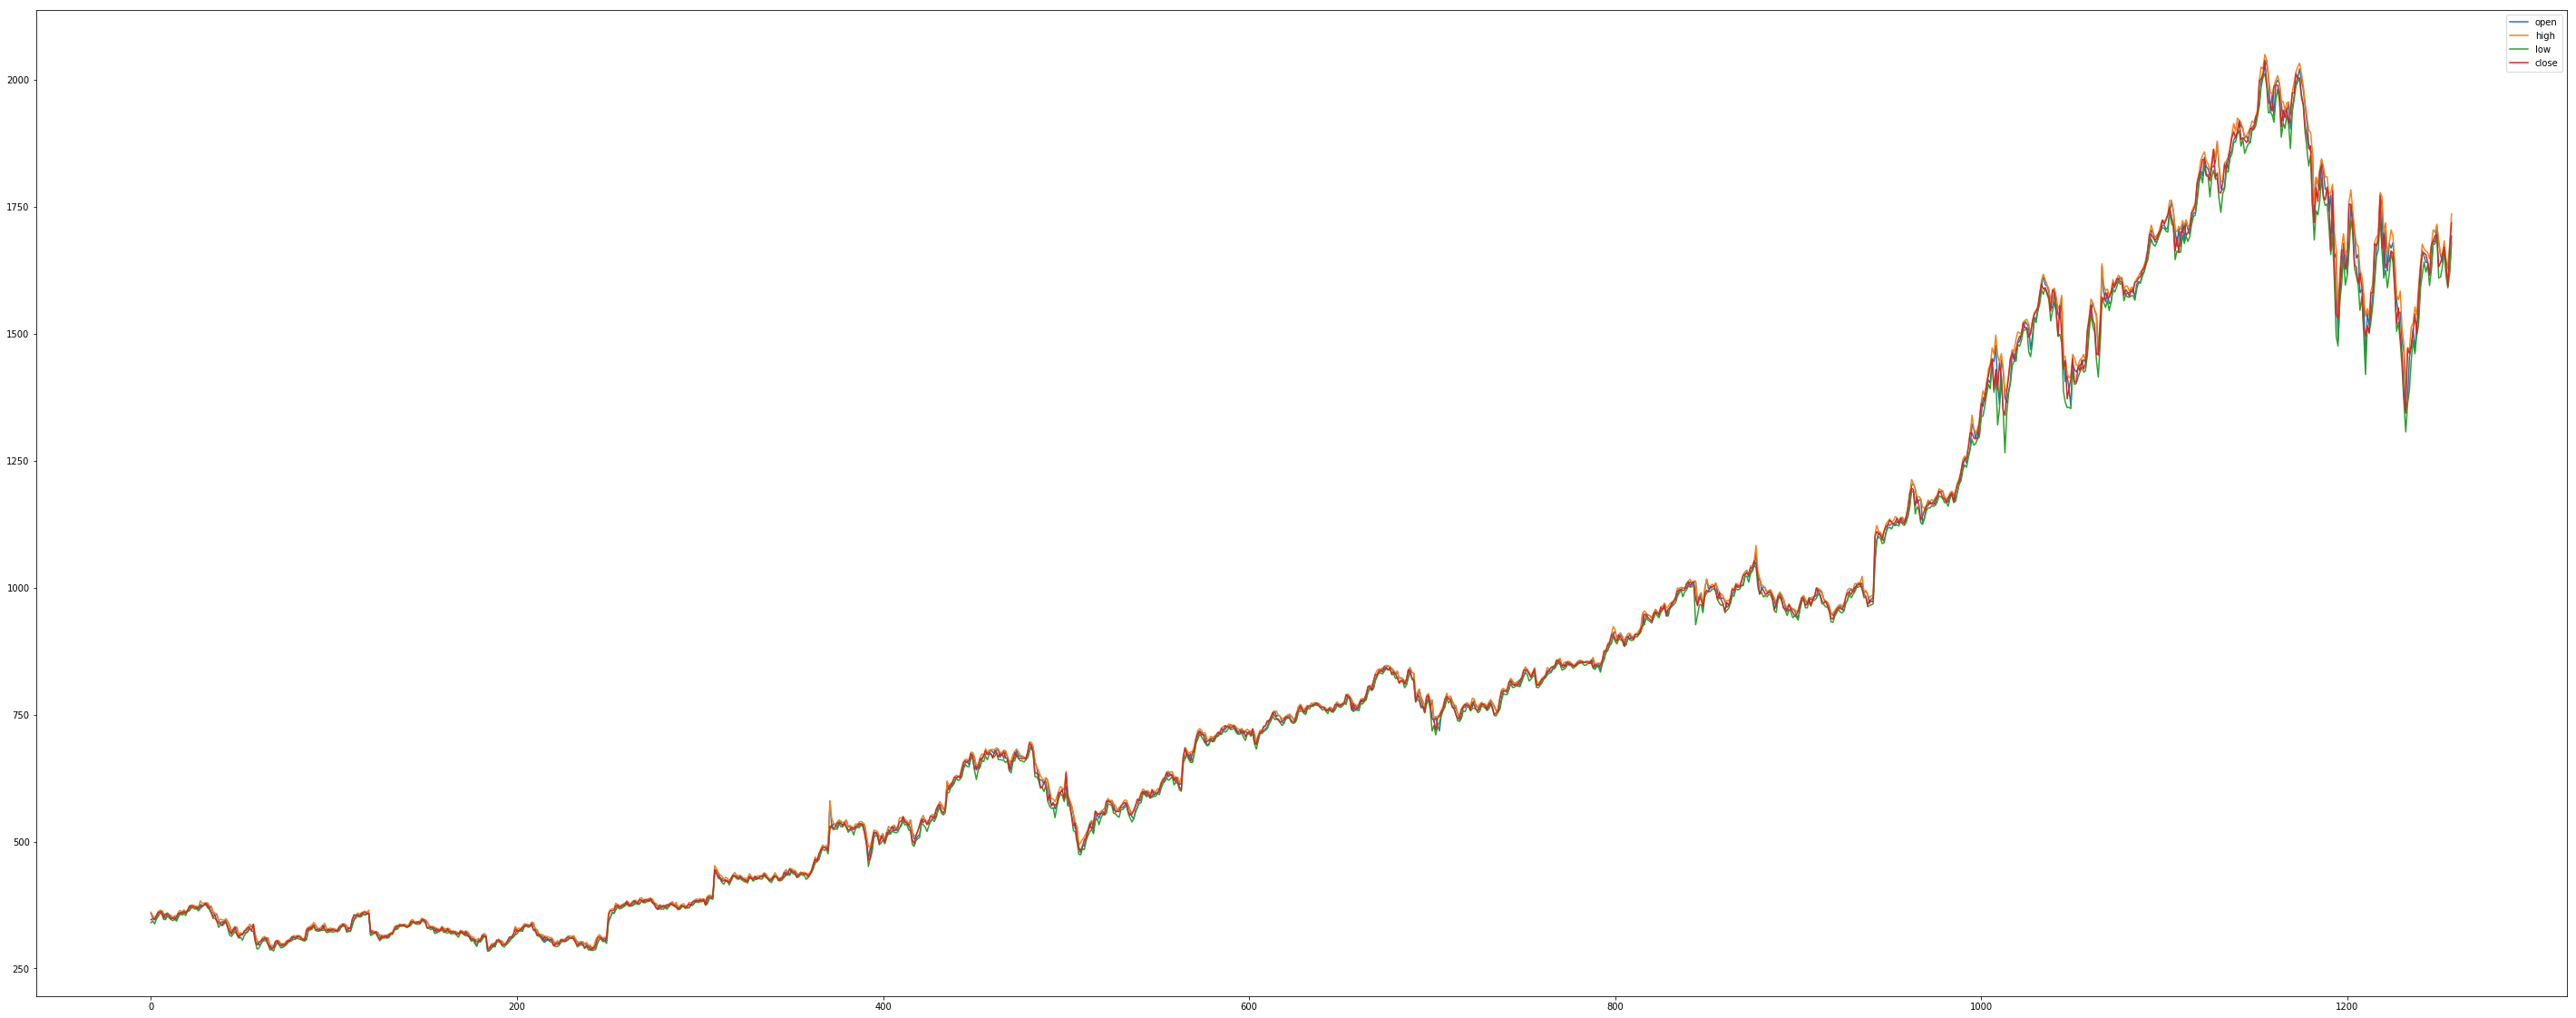

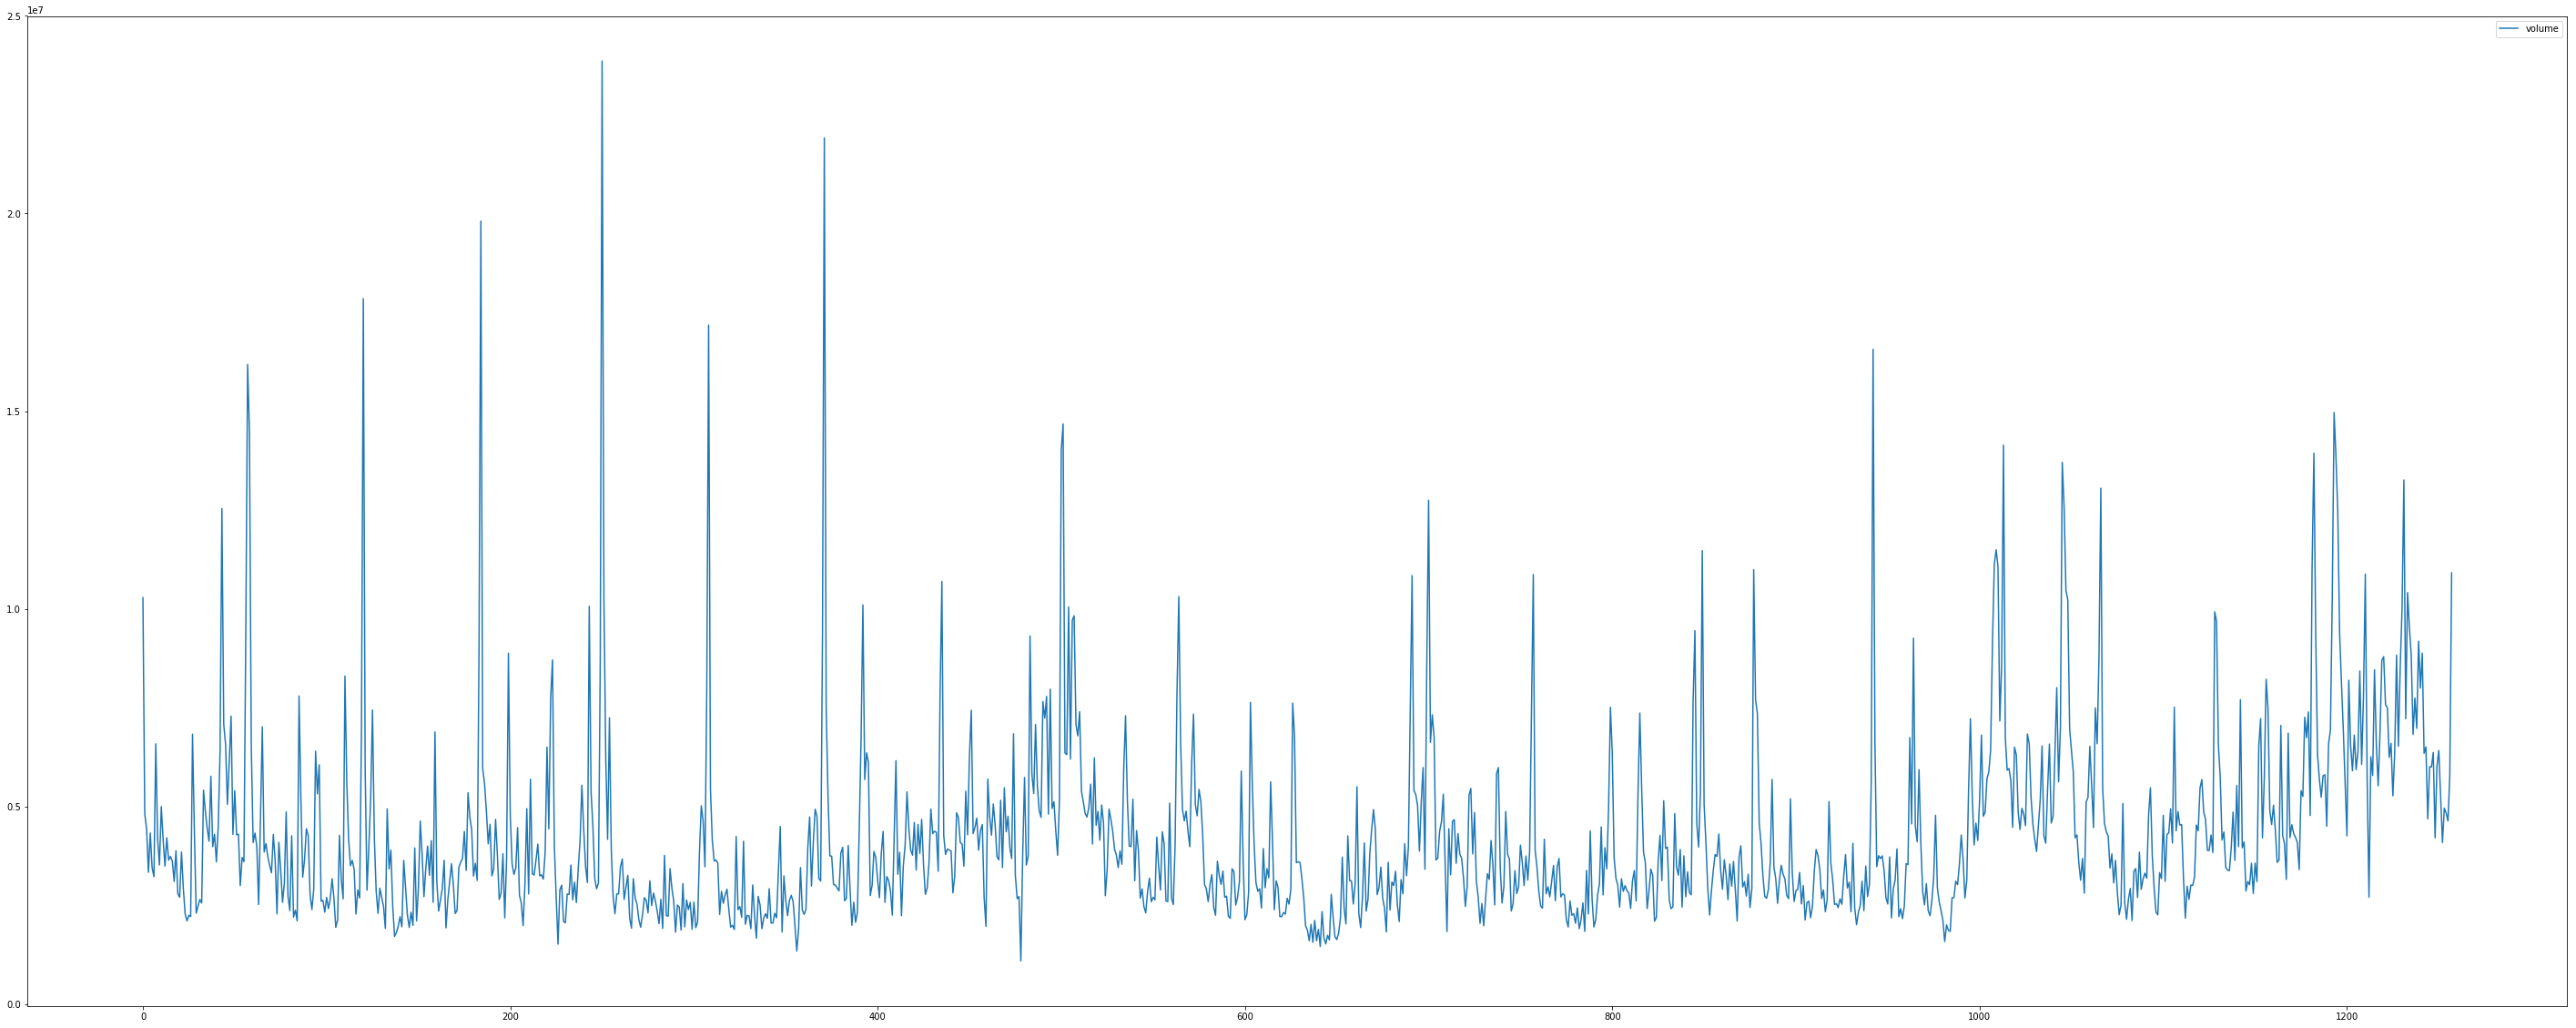

In [39]:
from matplotlib import pyplot
df1 = df.drop(['volume'], axis = 1)
df1.plot()
df2 = df.drop(['open', 'close', 'high', 'low'], axis =1)
df2.plot()
pyplot.show()


In [38]:
print(df1,df2)

            date      open       high       low    close
0     2014-02-03   358.980   360.8500   340.100   346.15
1     2014-02-04   349.590   353.9975   344.020   347.95
2     2014-02-05   346.000   349.3700   337.730   346.45
3     2014-02-06   347.403   354.8200   347.403   354.59
4     2014-02-07   358.980   361.8000   352.490   361.08
5     2014-02-10   361.610   365.0000   359.350   360.87
6     2014-02-11   361.842   363.6100   356.250   361.79
7     2014-02-12   356.430   357.7500   346.320   349.25
8     2014-02-13   347.700   357.2000   346.500   357.20
9     2014-02-14   359.340   359.3400   353.350   357.35
10    2014-02-18   355.280   355.7300   349.450   353.65
11    2014-02-19   352.640   354.5400   346.100   347.38
12    2014-02-20   348.800   350.4600   344.380   349.80
13    2014-02-21   352.440   354.1410   346.750   346.76
14    2014-02-24   345.190   353.0000   343.290   351.78
15    2014-02-25   353.000   361.0800   351.580   358.32
16    2014-02-26   359.860   36